In [1]:
from matplotlib import pyplot as plt
import sys
sys.path.append('../examples/')
from linear_regression_jax import LinearRegression, generate_data
from jax import numpy as jnp
import numpy as np

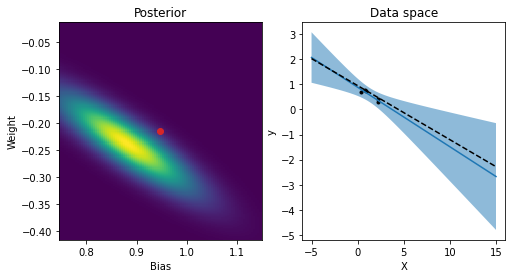

In [2]:
N = 5
D = 1
X, y, w, b = generate_data(N, D, sigma_noise=.1)
X_range = jnp.array([jnp.linspace(-5,15,100)]).T
lreg = LinearRegression(X, y, sigma_y=.1, sigma_prior=1)
lreg.get_posterior()
prediction_density = lreg.predict(X_range)

w_range, b_range = jnp.linspace(w[0] - .2, w[0] + .2, 200), jnp.linspace(b[0] - .2, b[0] + .2,100)
w_mesh, b_mesh = jnp.meshgrid(w_range, b_range)
mesh = jnp.vstack([b_mesh.flatten(), w_mesh.flatten()]).T
posterior_mesh = lreg.posterior.evaluate(mesh)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.pcolor(b_range, w_range, posterior_mesh.reshape(100,200).T, shading='auto')
plt.plot(b, w, 'C3o')
plt.xlabel('Bias')
plt.ylabel('Weight')
plt.title('Posterior')
plt.subplot(122)
plt.plot(X, y, 'k.')
mu, std = jnp.squeeze(prediction_density.mu), jnp.sqrt(jnp.squeeze(prediction_density.Sigma))
plt.fill_between(jnp.squeeze(X_range), mu - 2.58 * std, mu + 2.58 * std, alpha=.5)
plt.plot(jnp.squeeze(X_range), mu, 'C0')
plt.plot(jnp.squeeze(X_range), jnp.dot(X_range, w) + b, 'k--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data space')
plt.show()